<a href="https://colab.research.google.com/github/yj5x/AI-tasks/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Libraries


# data handling
import pandas as pd
import numpy as np

# charts
import matplotlib.pyplot as plt
import seaborn as sns


# division + classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,accuracy_score



In [ ]:
## uploading data

from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/AI in business /WA_Fn-UseC_-Telco-Customer-Churn.csv')
df=data.copy()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## data exploration and cleaning


# number of rows and columns
print("Number of rows and columns", df.shape)

print()
print()

# first 5 rows
display(df.head())

print()
print()

# a look at data types and missing values
df.info()

print()
print()

# a look at contnt of each column
for col in df.columns:
    print(f"{col}: {df[col].unique()[:10]}")



Number of rows and columns (7043, 21)




,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object

In [ ]:
print()
print()

# remove unnecessary columns
df.drop('customerID', axis=1, inplace=True)

# convert TotalCharges to numbers
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# check s there any missing values
display(df.isnull().sum())

print()
print()

# counting values for numerical columns
# its number is 4
df.describe()


,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
# delete the rows that have missing values

df.dropna(inplace=True)

# check again
display(df.isnull().sum())
df.describe()


,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


array(['No', 'Yes'], dtype=object)

,count
Churn,
No,5163
Yes,1869


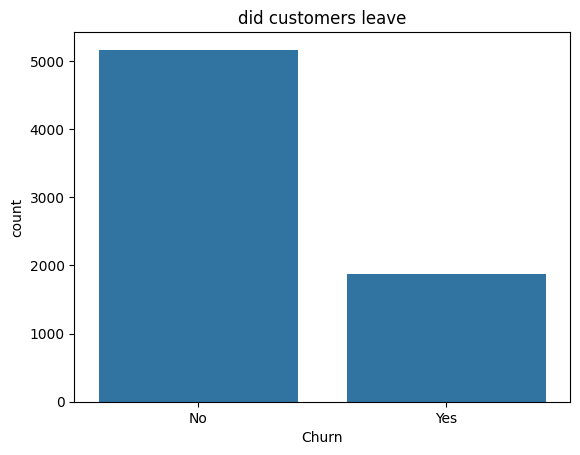

In [ ]:
## EDA

# start analyzing the column Churn
# let's see the values in it
display(df['Churn'].unique())

# how many customers said yes and how many said no
display(df['Churn'].value_counts())


# a chart showing the distribution
sns.countplot(data=df, x="Churn")
plt.title("did customers leave")
plt.show()


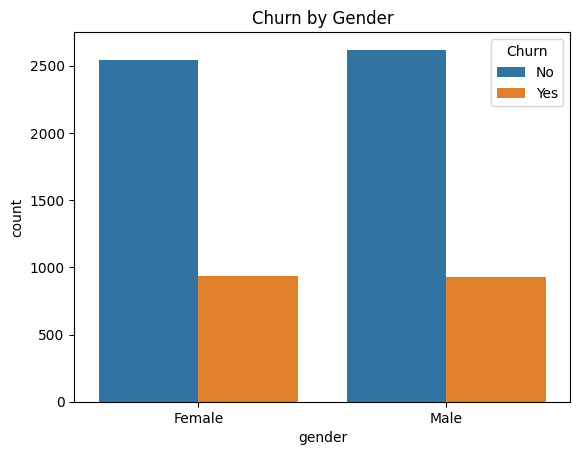

In [ ]:
# Churn relation with the classification columns
# for exampl Gender
sns.countplot(x="gender", hue="Churn", data=df)
plt.title("Churn by Gender")
plt.show()



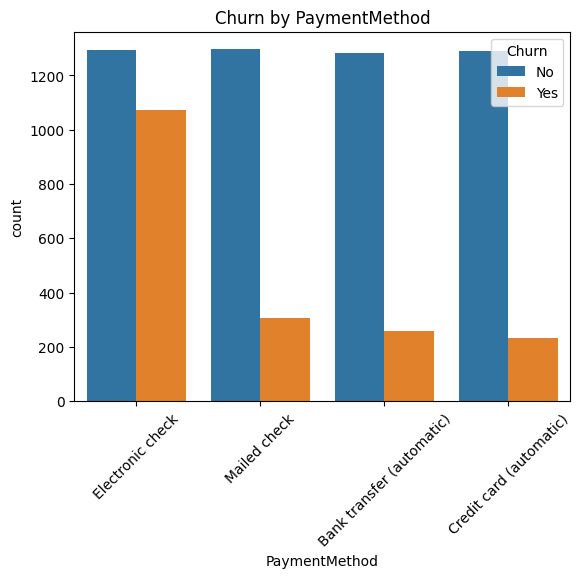

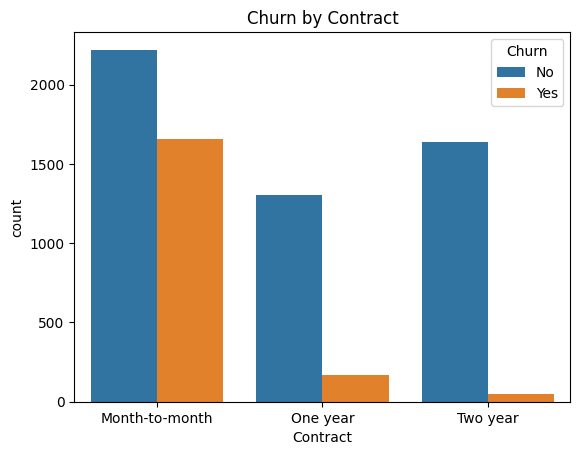

In [ ]:


print()
print()

#PaymentMethod
sns.countplot(x="PaymentMethod", hue="Churn", data=df)
plt.title("Churn by PaymentMethod",)
plt.xticks(rotation=45)
plt.show()

print()
print()

#Contract
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Churn by Contract")
plt.show()



In [ ]:
# Churn relation with the numerical columns

# let's see what numerical columns we have
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
display(numerical_cols)



Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

,SeniorCitizen
count,7032.000000
mean,0.162400
std,0.368844
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


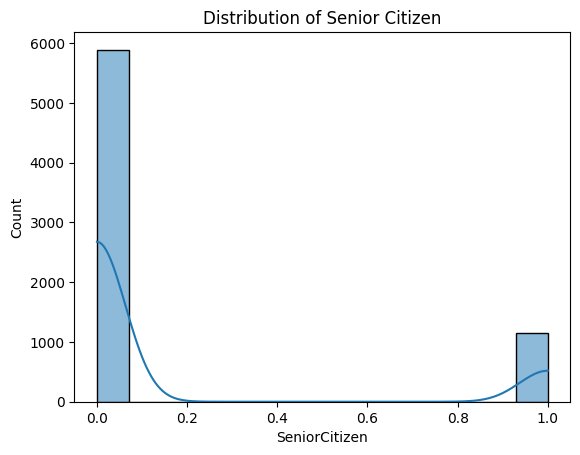

,tenure
count,7032.000000
mean,32.421786
std,24.545260
min,1.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


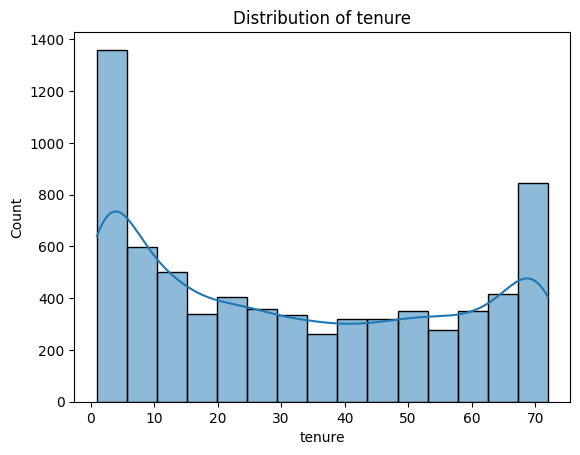

,MonthlyCharges
count,7032.000000
mean,64.798208
std,30.085974
min,18.250000
25%,35.587500
50%,70.350000
75%,89.862500
max,118.750000


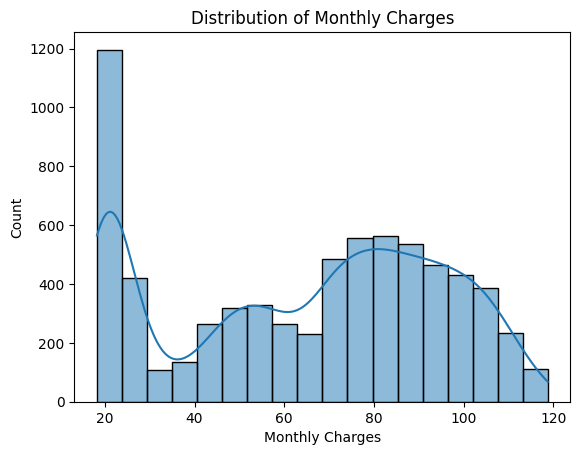

,TotalCharges
count,7032.000000
mean,2283.300441
std,2266.771362
min,18.800000
25%,401.450000
50%,1397.475000
75%,3794.737500
max,8684.800000


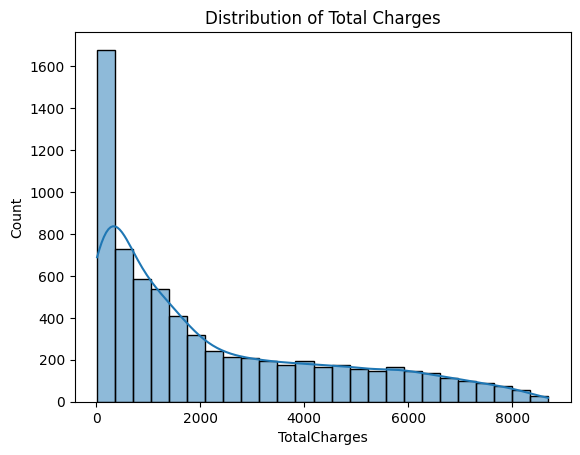

In [ ]:
# since there are only four
# let's take each column, see what it contains, and look at distribution chart


#SeniorCitizen
display(df["SeniorCitizen"].describe())


sns.histplot(df["SeniorCitizen"], kde=True)
plt.title("Distribution of Senior Citizen")
plt.xlabel("SeniorCitizen")
plt.ylabel("Count")
plt.show()


#tenure
display(df["tenure"].describe())


sns.histplot(df["tenure"], kde=True)
plt.title("Distribution of tenure")
plt.xlabel("tenure")
plt.ylabel("Count")
plt.show()


#MonthlyCharges
display(df["MonthlyCharges"].describe())


sns.histplot(df["MonthlyCharges"], kde=True)
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Count")
plt.show()

#TotalCharges
display(df["TotalCharges"].describe())


sns.histplot(df["TotalCharges"], kde=True)
plt.title("Distribution of Total Charges")
plt.xlabel("TotalCharges")
plt.ylabel("Count")
plt.show()




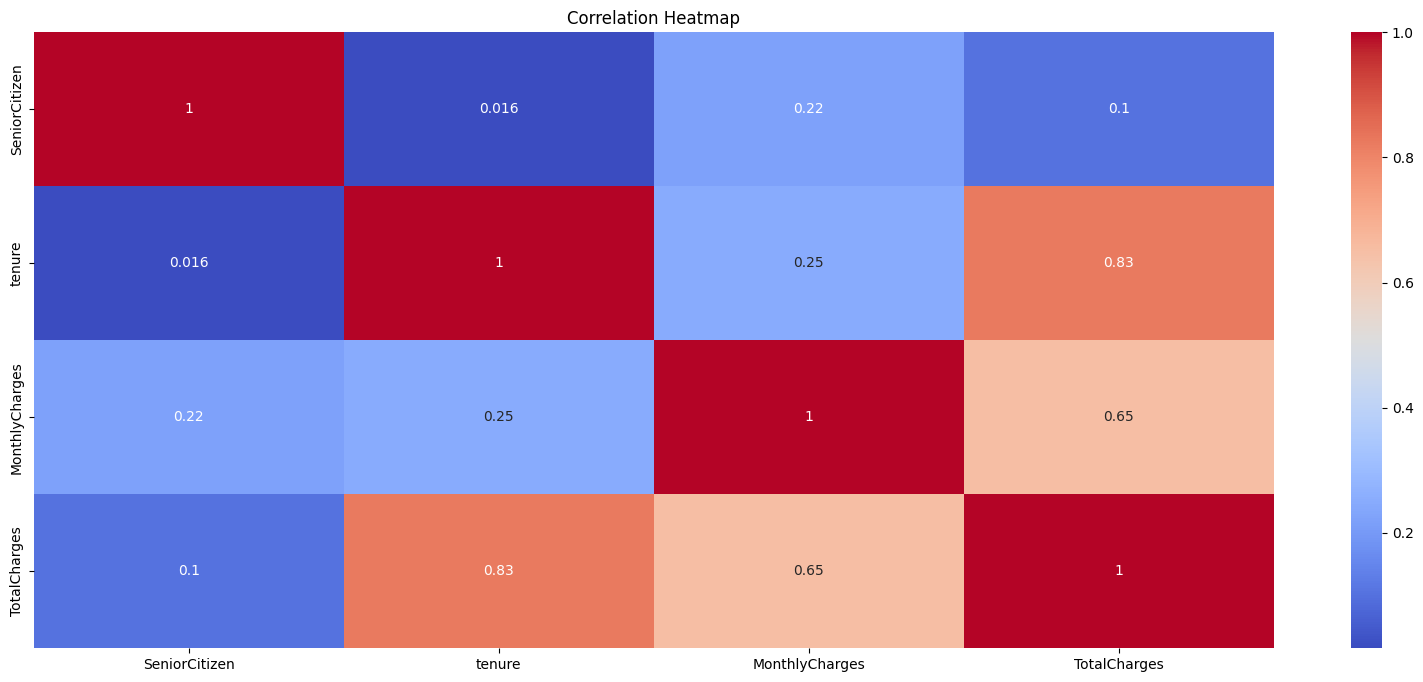

In [ ]:
# Heatmap of correlations
# for numerical columns



plt.figure(figsize=(20,8))
sns.heatmap((df.corr(numeric_only=True)), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
## Encoding

# converting objects columns to numbers


# define the columns
object_cols = df.select_dtypes(include=['object']).columns

for col in object_cols:
    if df[col].nunique() <= 2:
        # Label Encoding
        df[col] = LabelEncoder().fit_transform(df[col])
    else:
        # One-Hot Encoding
        dummies = pd.get_dummies(df[col], prefix=col, drop_first=True)
        df = df.drop(col, axis=1)
        df = pd.concat([df, dummies], axis=1)


#df.dtypes
#df = df.astype({col : int for col in df.columns if df[col].dtype == 'bool'})

# check
display(df)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,...,True,False,True,False,True,True,False,False,False,True
7039,0,0,1,1,72,1,1,103.20,7362.90,0,...,False,False,True,False,True,True,False,True,False,False
7040,0,0,1,1,11,0,1,29.60,346.45,0,...,False,False,False,False,False,False,False,False,True,False
7041,1,1,1,0,4,1,1,74.40,306.60,1,...,False,False,False,False,False,False,False,False,False,True


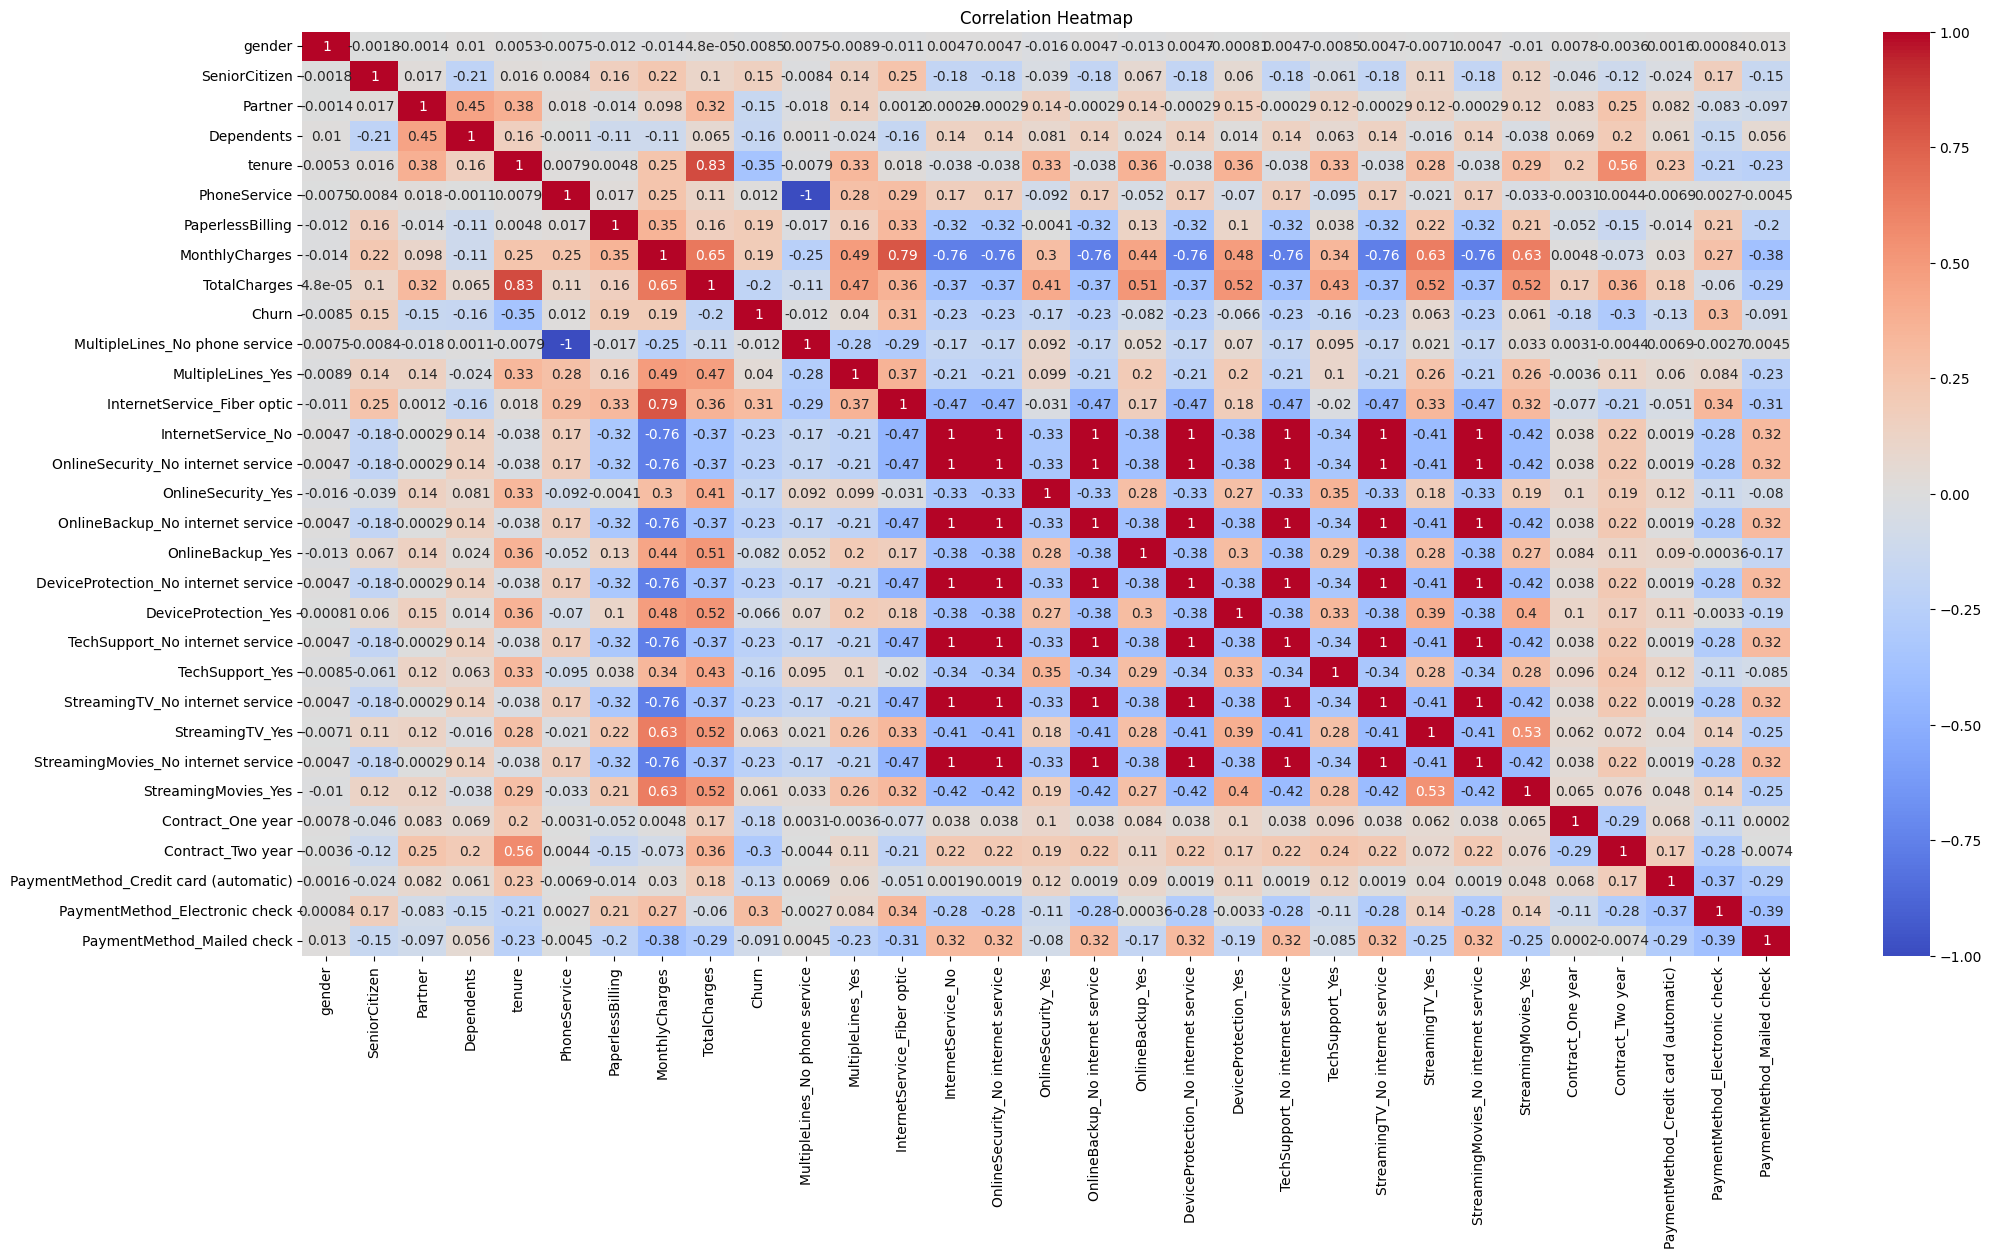

In [ ]:
# Heatmap of correlations
# the relation between all the columns



plt.figure(figsize=(24,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
## data division

# separate the data
X = df.drop('Churn', axis=1)
y = df['Churn']

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the numerical columns of the training data
numericcols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Normalization
scaler = MinMaxScaler()
X_train[numericcols] = scaler.fit_transform(X_train[numericcols])
X_test[numericcols] = scaler.transform(X_test[numericcols])

# فhe number of training and test data
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (5625, 30)
Testing data shape: (1407, 30)


Accuracy: 0.7882018479033405


Confusion Matrix:
 [[917 116]
 [182 192]]


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



ROC-AUC Score: 0.8315818627019583


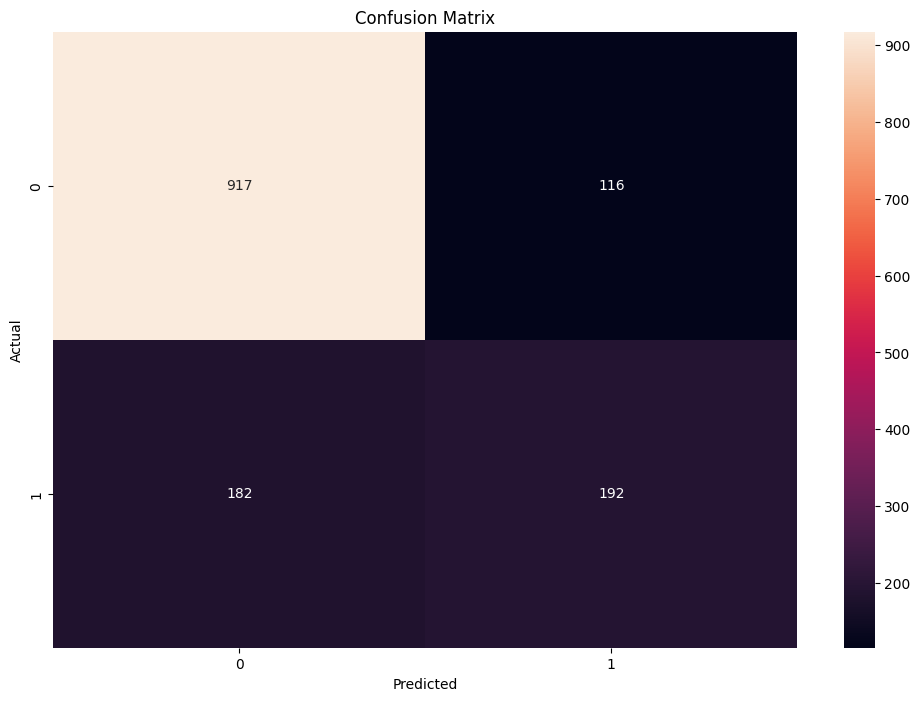

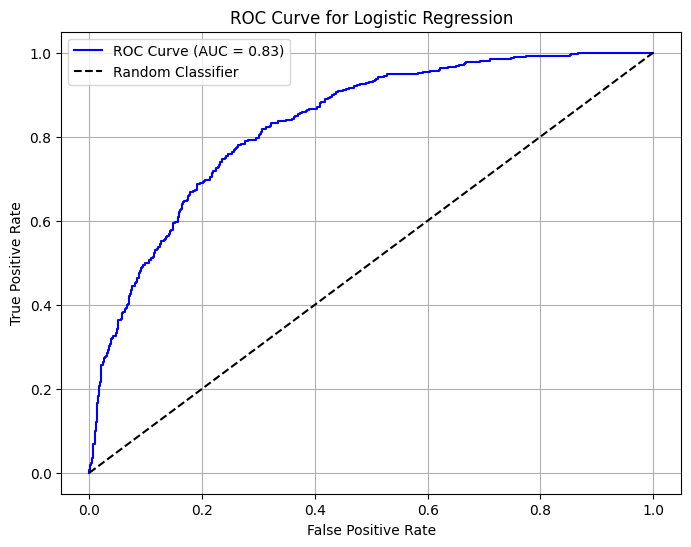

In [ ]:
## model Training
# i will take each one individually

# Logistic Regression
model_lr = LogisticRegression(max_iter=1000 )

# train the model
model_lr.fit(X_train, y_train)

# now I let it predict the results
y_pred_lr = model_lr.predict(X_test)



## model evaluation:

# Accuracy:
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

print()
print()

# Confusion Matrix:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
# illustration by chart
plt.figure(figsize=(12, 8))
plt.title("Confusion Matrix")
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm,annot=True,fmt='d',)
plt.xlabel('Predicted')
plt.ylabel('Actual')

print()
print()

# Classification Report:
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

print()
print()

# ROC-AUC:
# calculate the probabilities of 0 and 1 for prediction
# and what is important to me is the likelihood that I will lose the client = 1
y_pred_proba_lr = model_lr.predict_proba(X_test)[:, 1]

# calculate the score (0,1)
roc_auc = roc_auc_score(y_test, y_pred_proba_lr)
print("ROC-AUC Score:", roc_auc)

# values of roc-curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_lr)

# roc-curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
# the line that the model is supposed to outperform
# because if it does not outperform it, it is considered even worse than random
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


Accuracy: 0.7874911158493249


Confusion Matrix:
 [[936  97]
 [202 172]]


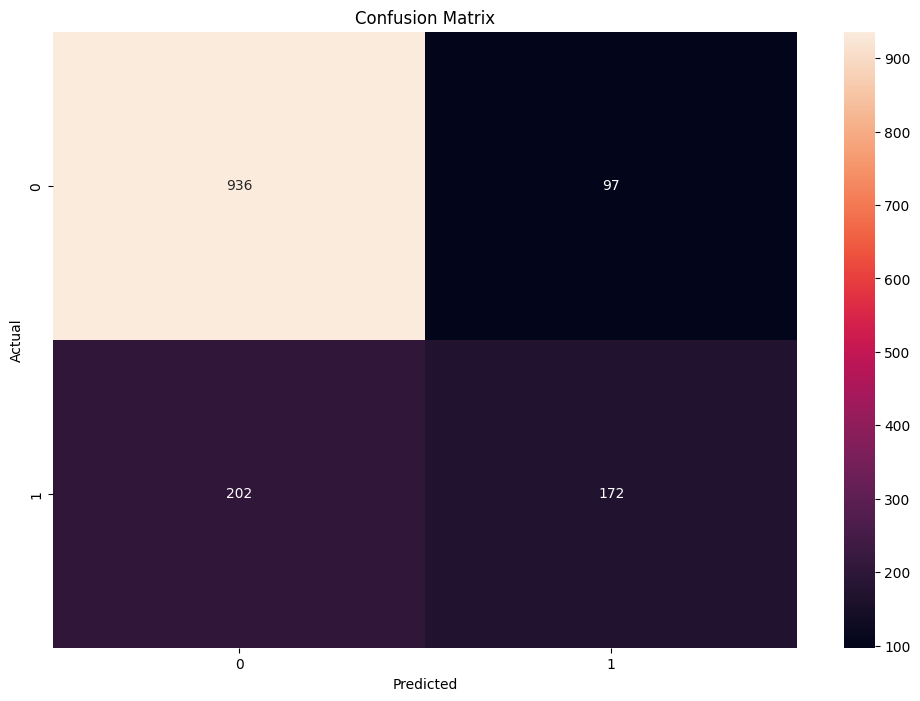



Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.46      0.53       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.78      1407



ROC-AUC Score: 0.8173613016446569


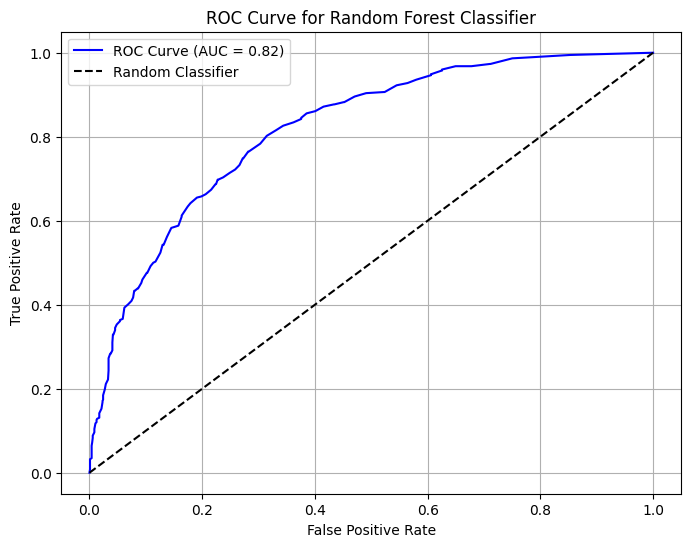

In [ ]:
# Random Forest Classifier

# creating the model
model_rf = RandomForestClassifier(random_state=42)

# Train the model
model_rf.fit(X_train, y_train)

# predict the results
y_pred_rf = model_rf.predict(X_test)

## evaluation:

# Accuracy:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

print()
print()

# Confusion Matrix:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
# illustration by chart
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print()
print()

# Classification Report:
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

print()
print()

# ROC-AUC:
# calculate the prediction
y_pred_proba_rf = model_rf.predict_proba(X_test)[:, 1]

# calculate the score
roc_auc = roc_auc_score(y_test, y_pred_proba_rf)
print("ROC-AUC Score:", roc_auc)

# values of roc-curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)

# roc-curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend()
plt.grid(True)
plt.show()


Accuracy: 0.7839374555792467


Confusion Matrix:
 [[926 107]
 [197 177]]


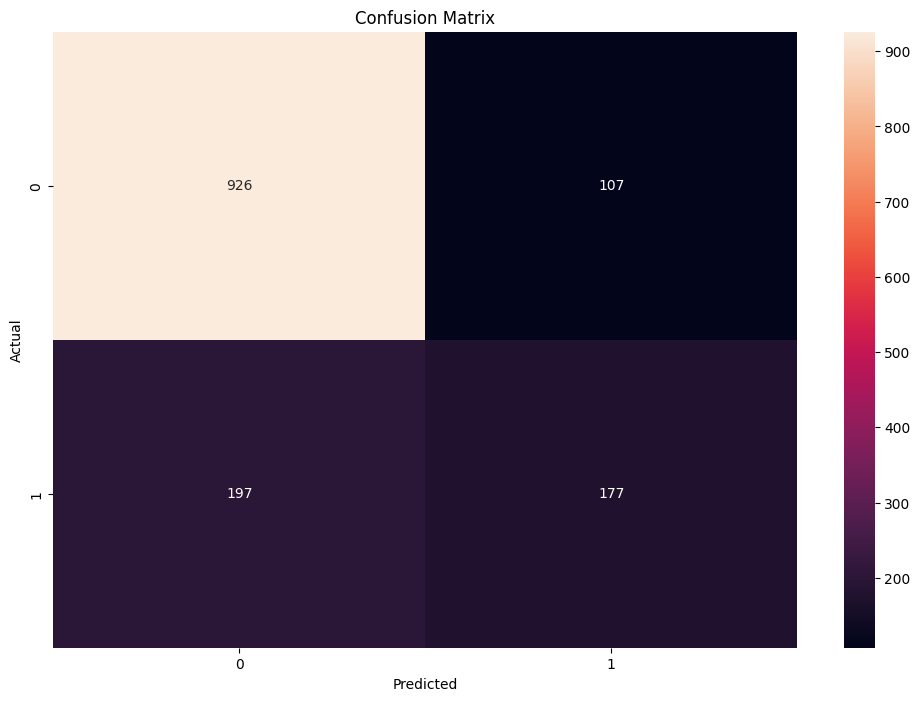



Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.62      0.47      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407



ROC-AUC Score: 0.7834483436954822


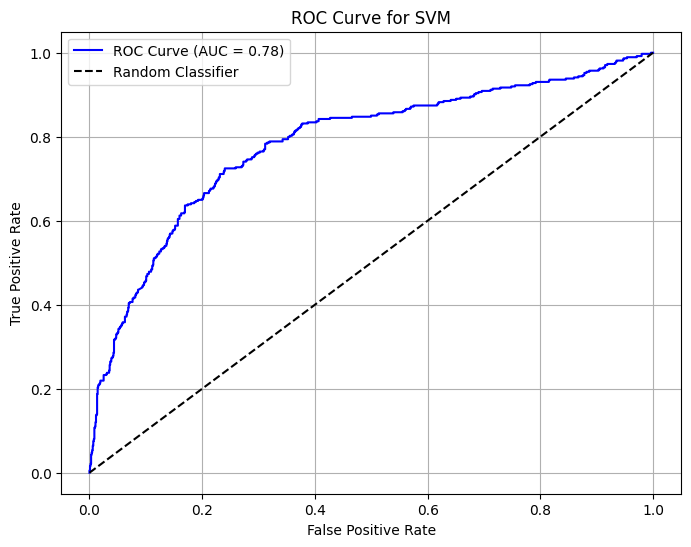

In [ ]:
# SVM

''' important :
this model does not calculate probabilities,
it gives the result directly,
that's why i added (probability=True)
'''
# creating the model
# 'rbf' (Radial Basis Function)
model_svm = SVC(kernel='rbf',probability=True, random_state=30)

# train the model
model_svm.fit(X_train, y_train)

# predict the results
y_pred_svm = model_svm.predict(X_test)

## evaluation:

# Accuracy:
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

print()
print()

# Confusion Matrix:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
# illustration by chart
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print()
print()

# Classification Report:
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

print()
print()

# ROC-AUC:
# calculate the prediction
y_pred_proba_svm = model_svm.predict_proba(X_test)[:, 1]

# calculate the score
roc_auc = roc_auc_score(y_test, y_pred_proba_svm)
print("ROC-AUC Score:", roc_auc)

#  values of roc-curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_svm)

# roc-curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend()
plt.grid(True)
plt.show()
